In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/'
data_url = url + 'iris.data'
col = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']

data = pd.read_csv(data_url)
data.columns = col
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# Exploratory data

In [ ]:
data.isna().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64

In [ ]:
data.duplicated().sum()

3

In [ ]:
duplicated = data[data.duplicated()]
duplicated

,Sepal length,Sepal width,Petal length,Petal width,Species
33,4.9,3.1,1.5,0.1,Iris-setosa
36,4.9,3.1,1.5,0.1,Iris-setosa
141,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
def findOutlier(data):
  for column in data.columns:
    q3, q1 = np.percentile(data[column], [75, 25])
    IQR = q3 - q1

    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR

    outlier = data[column][data[column] > upper_bound]
    outlier = data[column][data[column] < lower_bound]
    print("\nJumlah Outlier dari data", column)
    print(len(outlier))

In [ ]:
findOutlier(data.iloc[:, 0:4])


Jumlah Outlier dari data Sepal length
0

Jumlah Outlier dari data Sepal width
1

Jumlah Outlier dari data Petal length
0

Jumlah Outlier dari data Petal width
0


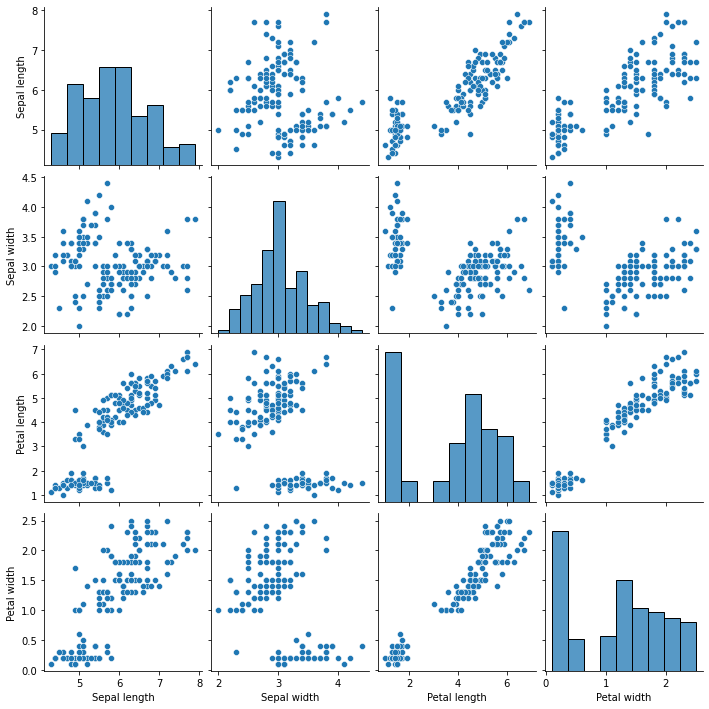

In [ ]:
sns.pairplot(data.iloc[:, 0:4])

#Preprocessing Data

menghilangkan data duplikat

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

memisahkan fitur dan label

In [ ]:
fitur = data.iloc[:, 0:4]
label = data['Species']

In [ ]:
fitur

,Sepal length,Sepal width,Petal length,Petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [ ]:
label

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Species, Length: 146, dtype: object

menghapus outlier

In [ ]:
def removeOutlier(data):
  for column in data.columns:
    perce = data[column].quantile([0.75, 0.25]).values
    IQR = perce[0] - perce[1]

    upper_bound = perce[0] + 1.5 * IQR
    lower_bound = perce[1] - 1.5 * IQR

    bound = [lower_bound, upper_bound]
    data[column][data[column] <= bound[0]] = bound[0]
    data[column][data[column] >= bound[1]] = bound[1]
  return data

In [ ]:
fitur = removeOutlier(fitur.iloc[:, 0:4])
findOutlier(fitur.iloc[:, 0:4])


Jumlah Outlier dari data Sepal length
0

Jumlah Outlier dari data Sepal width
0

Jumlah Outlier dari data Petal length
0

Jumlah Outlier dari data Petal width
0


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


melakukan scaling data

In [ ]:
scaler = MinMaxScaler()

fitur = scaler.fit_transform(fitur)
fitur

array([[0.16666667, 0.475     , 0.06779661, 0.04166667],
       [0.11111111, 0.575     , 0.05084746, 0.04166667],
       [0.08333333, 0.525     , 0.08474576, 0.04166667],
       [0.19444444, 0.775     , 0.06779661, 0.04166667],
       [0.30555556, 0.925     , 0.11864407, 0.125     ],
       [0.08333333, 0.675     , 0.06779661, 0.08333333],
       [0.19444444, 0.675     , 0.08474576, 0.04166667],
       [0.02777778, 0.425     , 0.06779661, 0.04166667],
       [0.16666667, 0.525     , 0.08474576, 0.        ],
       [0.30555556, 0.825     , 0.08474576, 0.04166667],
       [0.13888889, 0.675     , 0.10169492, 0.04166667],
       [0.13888889, 0.475     , 0.06779661, 0.        ],
       [0.        , 0.475     , 0.01694915, 0.        ],
       [0.41666667, 0.975     , 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.925     , 0.05084746, 0.125     ],
       [0.22222222, 0.725     , 0.06779661, 0.08333333],
       [0.38888889, 0.875     ,

mengubah label menjadi numerik

In [ ]:
def transform(label):
  num_label = []
  for l in label:
    if l == 'Iris-setosa':
      num_label.append(1)
    elif l == 'Iris-versicolor':
      num_label.append(2)
    else:
      num_label.append(3)
  return num_label

In [ ]:
label = transform(label)
label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

membagi data latih dan test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=.3)

#Fungsi *Training* ELM


In [ ]:
def elm_fit(X, target, h, W=None):
  start_time = time.time()

  if W is None:
    W = np.random.uniform(0, 1, (h, len(X[0])))

  Hinit = X @ W.T
  H = 1 / (1 + np.exp(-Hinit))
  Ht = H.T
  Hp = np.linalg.inv(Ht @ H) @ Ht
  beta = Hp @ target
  y = H @ beta

  execution = time.time() - start_time
  print('Waktu eksekusi: %s detik' % execution)
    
  return W, beta

#Fungsi *Testing* ELM

In [ ]:
def elm_predict(X, W, b, round_output=False):
  Hinit = X @ W.T
  H = 1 / (1 + np.exp(-Hinit))
  y = H @ b
  
  if round_output:
    y = [int(round(x)) for x in y]
  return y

# Klasifikasi *Dataset* Iris


In [ ]:
acc = []
rmse_score = []
for i in range (1,15):
  W, b = elm_fit(X_train, y_train, i)

  output = elm_predict(X_test, W, b, round_output=True)
  accuracy = accuracy_score(output, y_test)
  mse = mean_squared_error(y_test, output)
  rmse = math.sqrt(mse)
  acc.append(accuracy)
  rmse_score.append(rmse)
  print('Hidden Neuron: ', i)
  print('Output:', output)
  print('True :', y_test)
  print('\n')

Waktu eksekusi: 0.0018413066864013672 detik
Hidden Neuron:  1
Output: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
True : [3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2]


Waktu eksekusi: 0.0007822513580322266 detik
Hidden Neuron:  2
Output: [3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2]
True : [3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2]


Waktu eksekusi: 0.002812623977661133 detik
Hidden Neuron:  3
Output: [3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 3, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 3, 2, 1, 2, 3, 3, 3, 2, 3]
True : [3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2, 2

In [ ]:
acc

[0.38636363636363635,
 0.9545454545454546,
 0.9090909090909091,
 0.7727272727272727,
 0.8863636363636364,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
rmse_score

[0.7833494518006403,
 0.21320071635561044,
 0.30151134457776363,
 0.4767312946227962,
 0.337099931231621,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

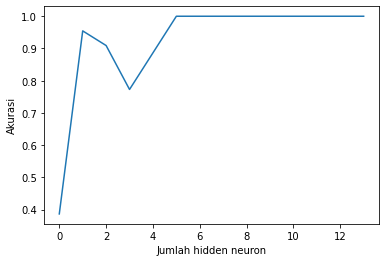

In [ ]:
plt.plot(acc)
plt.xlabel('Jumlah hidden neuron')
plt.ylabel('Akurasi')
plt.show()

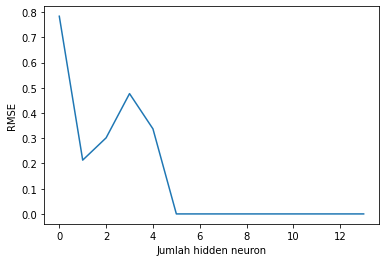

In [ ]:
plt.plot(rmse_score)
plt.xlabel('Jumlah hidden neuron')
plt.ylabel('RMSE')
plt.show()